In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Swiftly going through this output will help us observe any crazy values
for col in df:
    print(df[col].unique())

[6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58400e-02
 4.37900e-02 5.78900e-02 1.35540e-01 1.28160e-01 8.82600e-02 1.58760e-01
 9.16400e-02 1.95390e-01 7.89600e-02 9.51200e-02 1.01530e-01 8.70700e-02
 5.64600e-02 8.38700e-02 4.11300e-02 4.46200e-02 3.

In [7]:
# Number of rows and columns
df.shape

(506, 14)

The housing dataset has 506 rows and 14 columns.

Let's check for null values

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Univariate Analysis

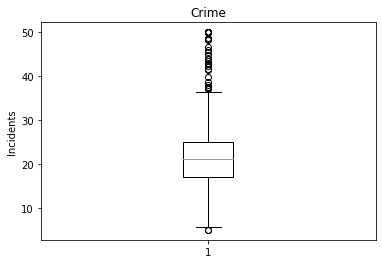

In [9]:
# Plot for Issued Amount
plt.boxplot(df['MEDV'])
plt.rcParams["figure.figsize"] = (5, 8)
plt.title("Crime")
plt.ylabel("Incidents")
plt.margins(x = 0)
plt.show()

Text(0.5, 1.0, 'KDE of CRIM')

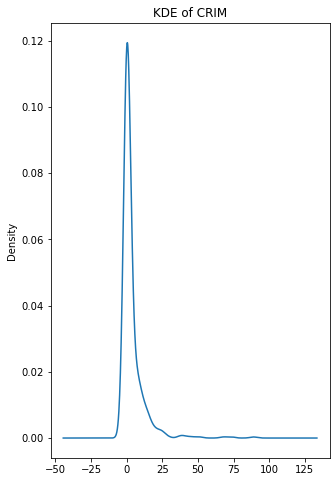

In [10]:
df['CRIM'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("KDE of CRIM")

Amount has a lot of outliers. Since this might be one of the features which could potentially have a large impact on our model, let's perform outlier treatment.

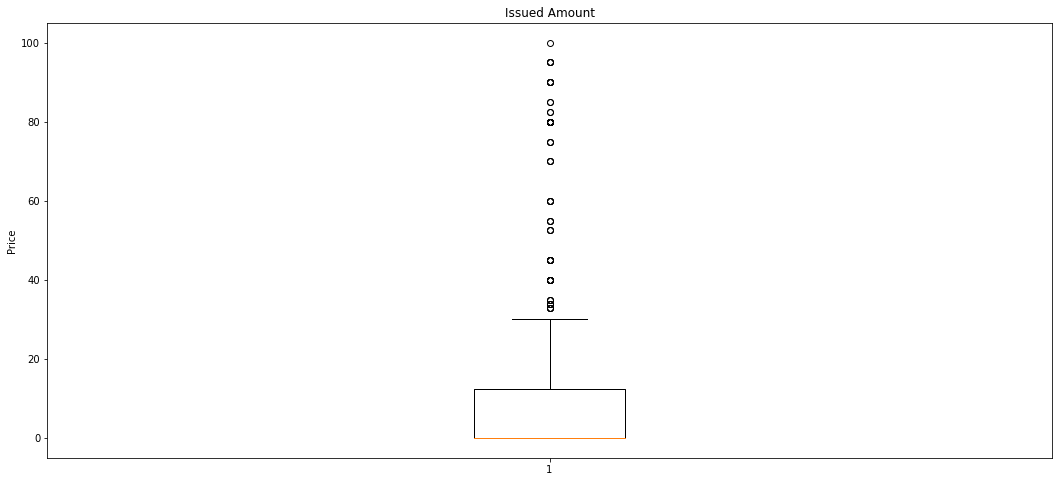

In [11]:
# Plot for Issued Amount
plt.boxplot(df['ZN'])
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Issued Amount")
plt.ylabel("Price")
plt.show()

Text(0.5, 1.0, 'KDE of ZN')

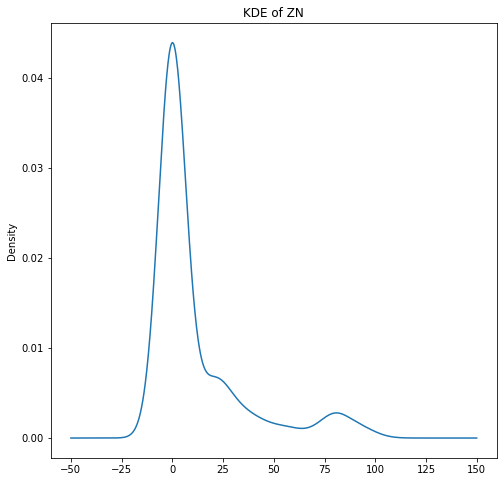

In [12]:
df['ZN'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("KDE of ZN")

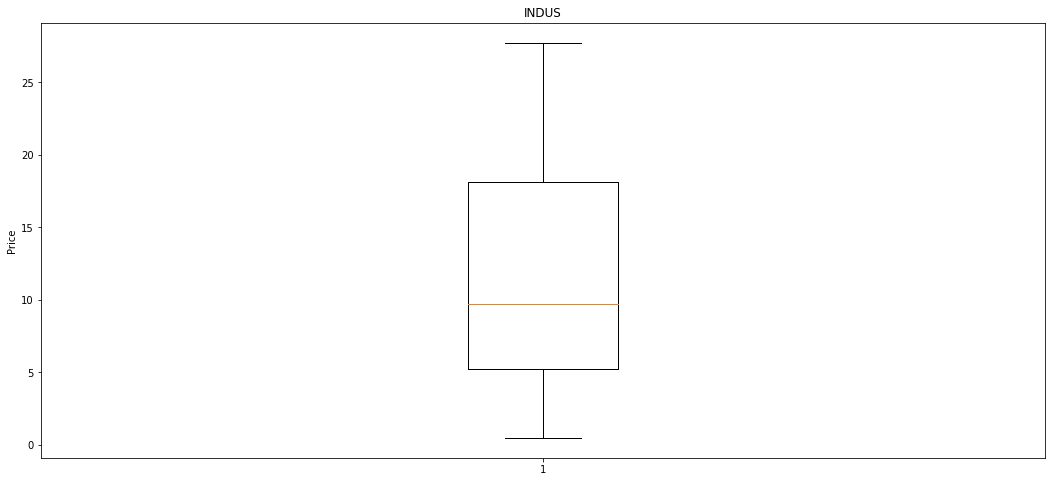

In [13]:
# Plot for INDUS
plt.boxplot(df['INDUS'])
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("INDUS")
plt.ylabel("Price")
plt.margins(x = 0)
plt.show()

Text(0.5, 1.0, 'KDE of INDUS')

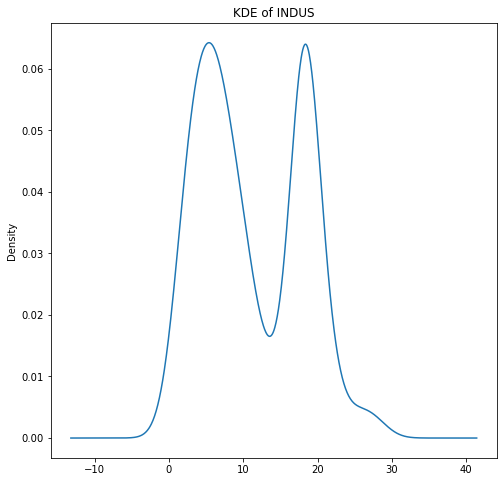

In [14]:
df['INDUS'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("KDE of INDUS")

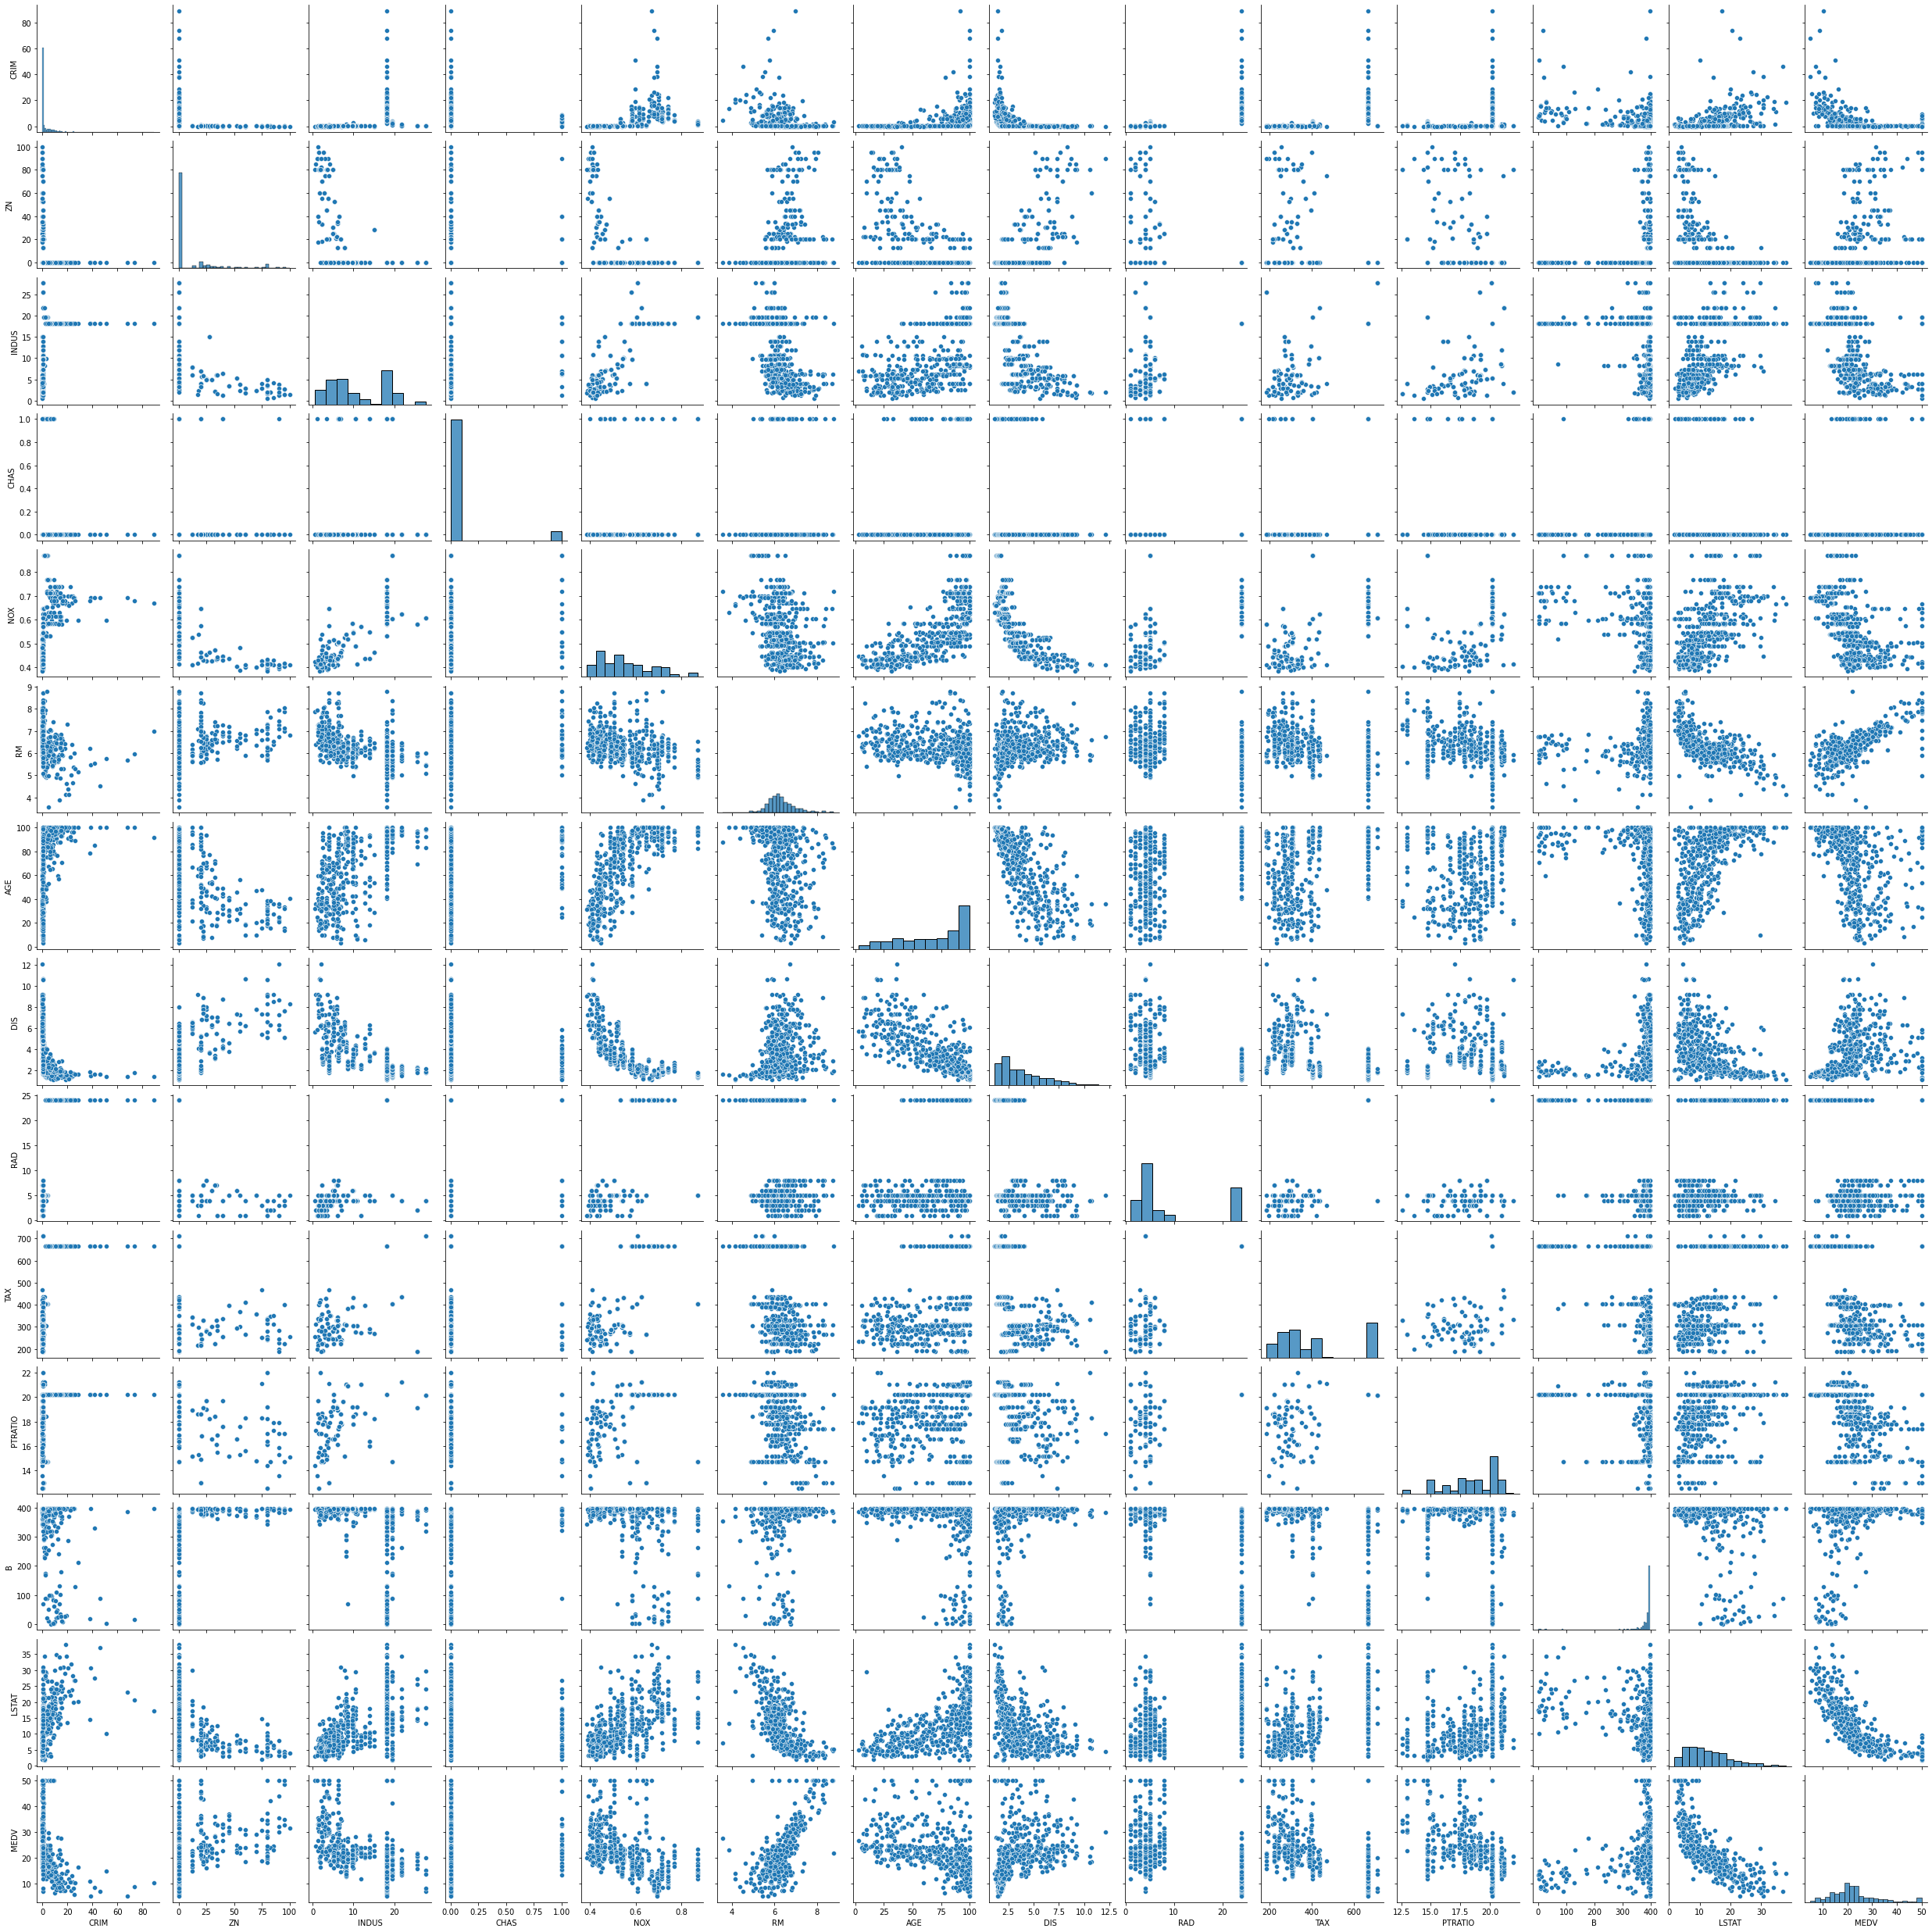

In [15]:
sns.pairplot(df)



- By perusing through all plots in the right most column, we can clearly observe some variables have a linear or non-linear relationship with MEDV.

- By going through all the other plots, we can observe some variables have a linear relationship with other variables.

Let's check out the correlation matrix.

/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanm

/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanm

/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanm

/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanm

/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanm

/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanm

/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanm

/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanm

/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanm

/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanm

/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanmanickam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/haiharanm

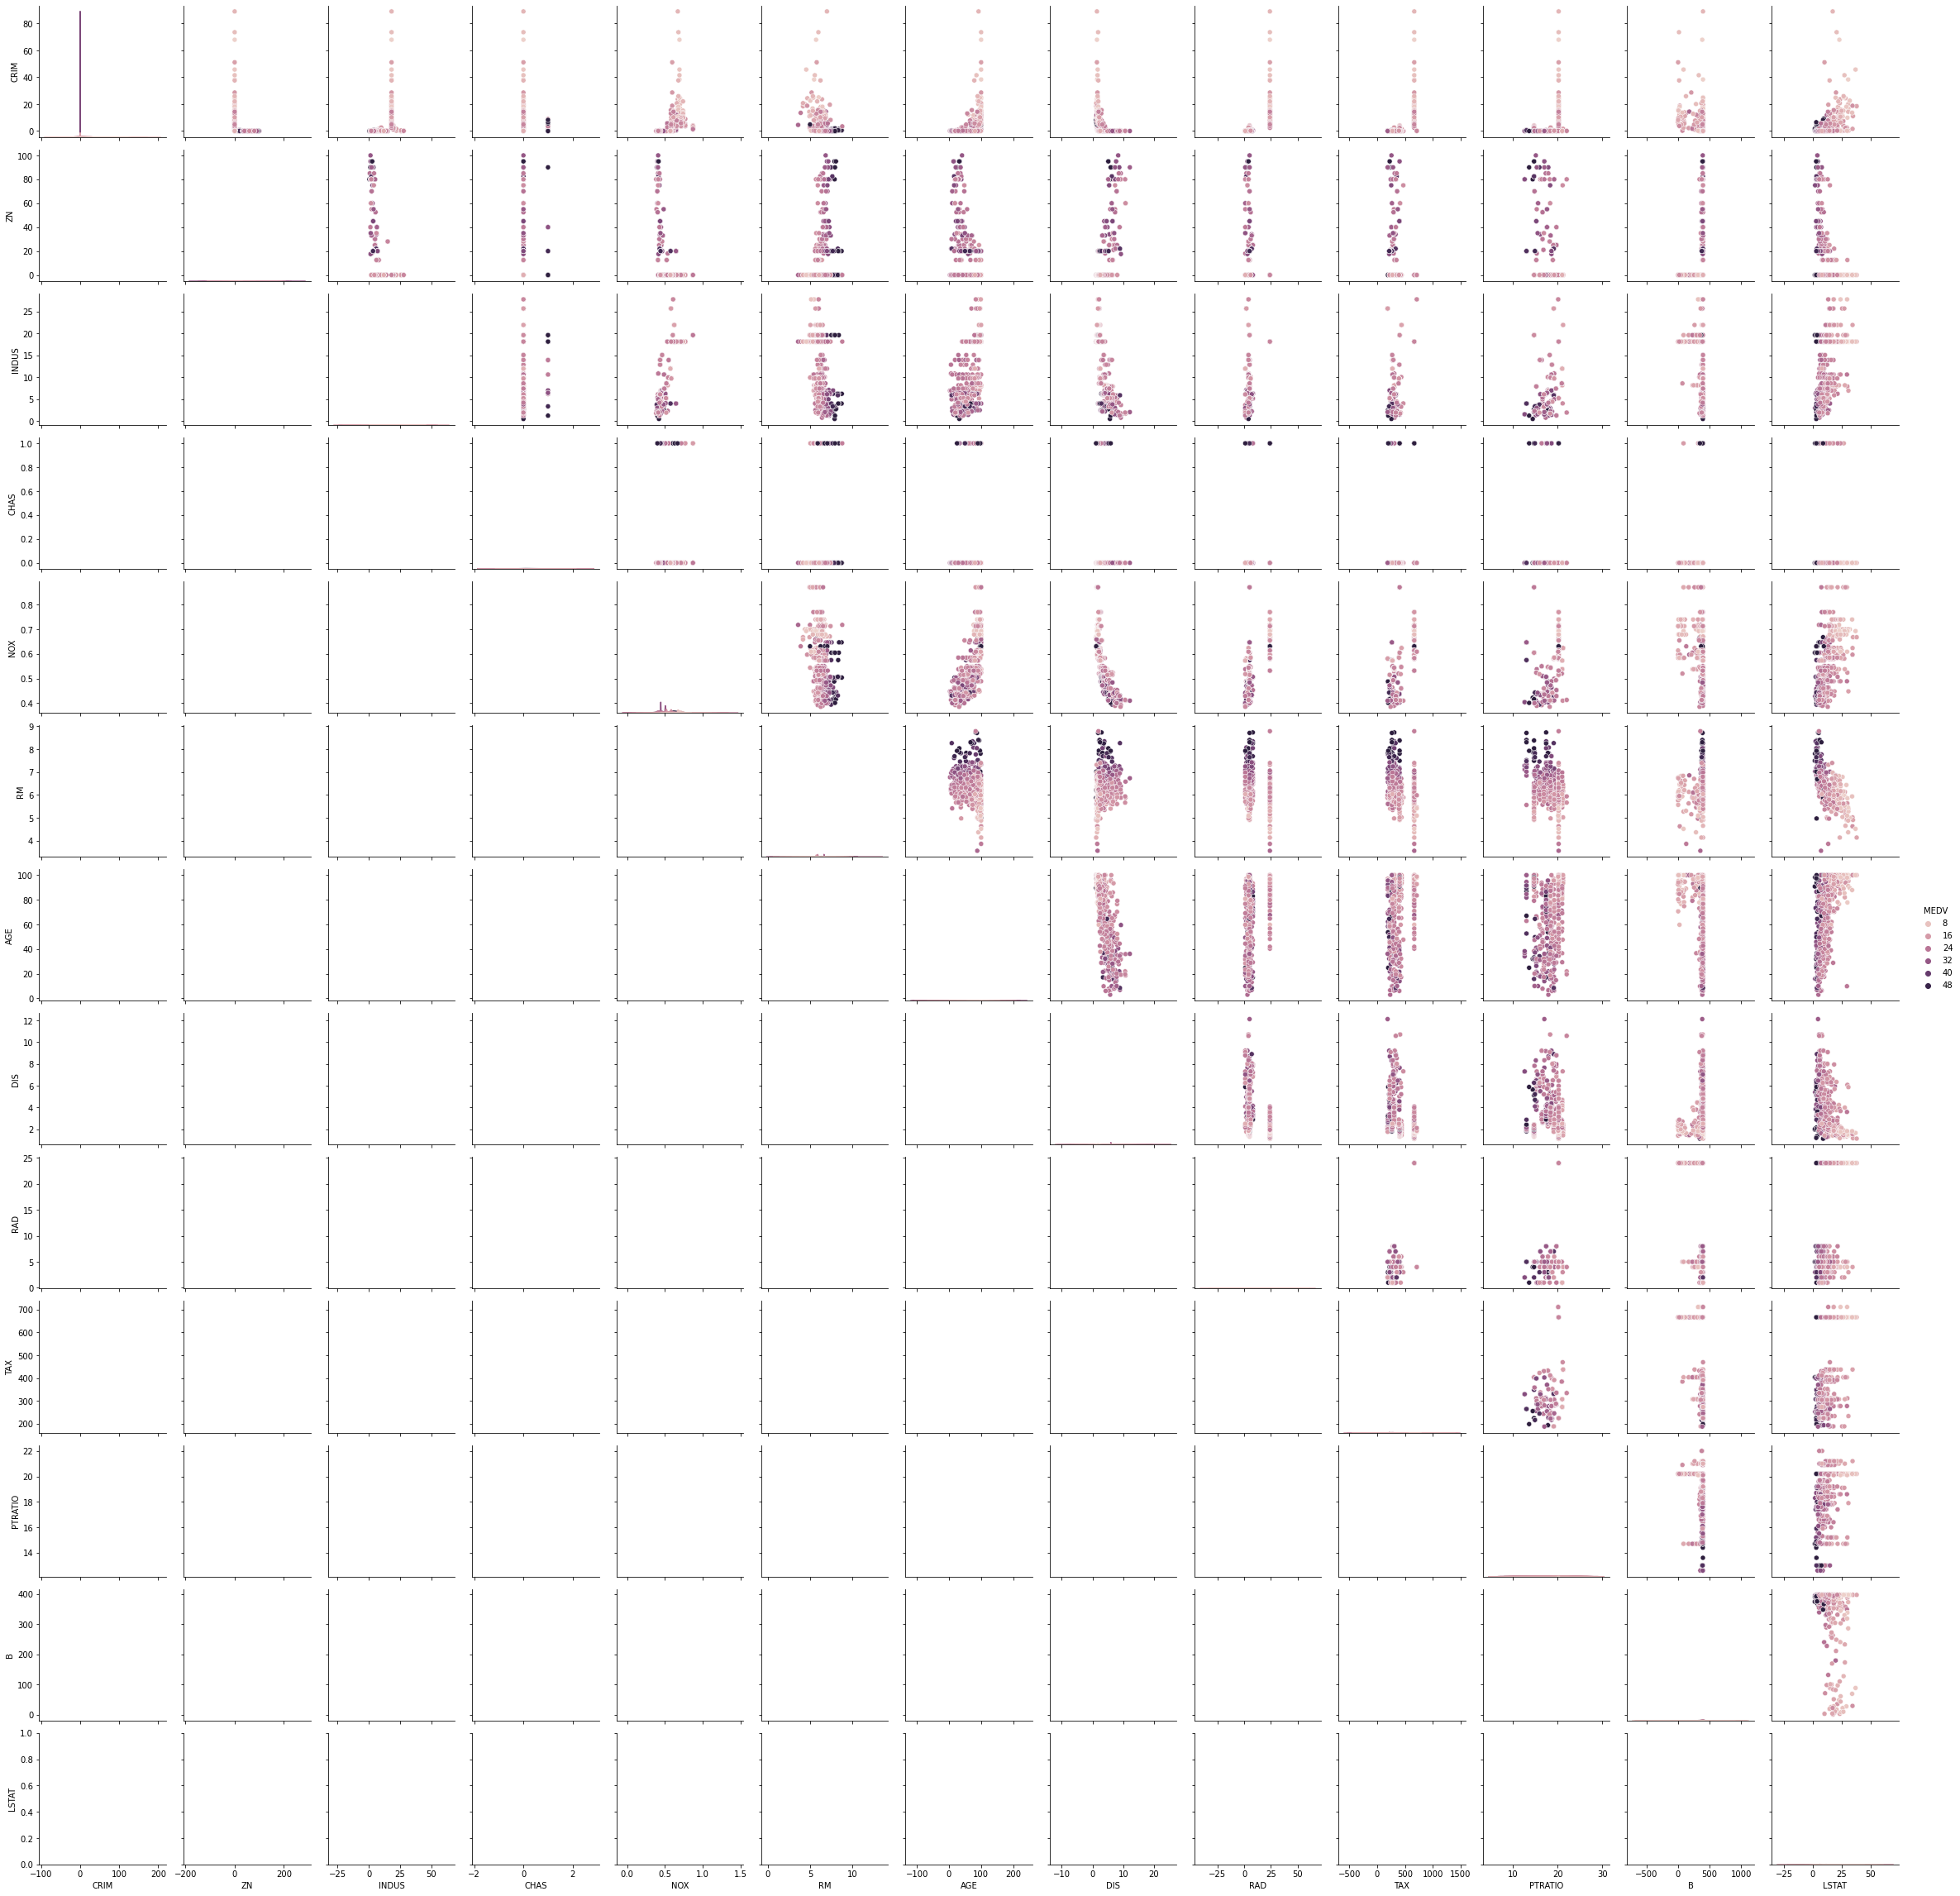

In [16]:
variables = []
g = sns.PairGrid(df, hue="MEDV")
# g = sns.PairGrid(df, hue="MEDV", vars=variables)
g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.add_legend()

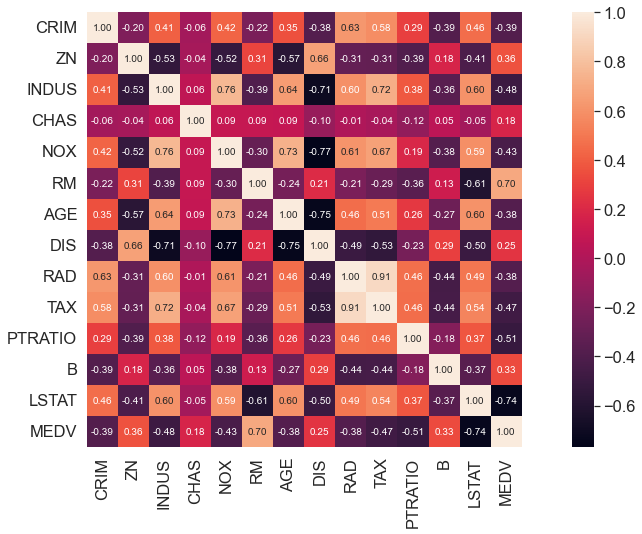

In [17]:
# cm = np.corrcoef(df.values.T)
# sns.set(font_scale=1.5)
# hm = sns.heatmap(df,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15})
# plt.show()

sns.set(font_scale=1.5)
sns.heatmap(df.corr(),cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10});

- Any variables with correlation higher than 0.5 or lower than -0.5 are considered to have a high correlation
- We can observe many variables do have a high correlation with other variables
- This is proof for what we observed in the pairplot above.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
# Train Test Split
# Removing first and last row as they contain na values
x = df.loc[:, df.columns != 'MEDV']
y = df['MEDV']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Linear Regression

In [20]:
# with sklearn
m1 = linear_model.LinearRegression()
m1.fit(x_train, y_train)

# print("Dependent var: Del_P\nIndependent var: OFI & Netbuy\n")
print('For training set \n')
print('Intercept: ', m1.intercept_,'\n')
print('Coefficients: ', m1.coef_,'\n')

# Predict on the train data
y_pred_train = m1.predict(x_train)

# Predict on the test data
y_pred_test = m1.predict(x_test)

# print('\nFor testing set\n')
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
# print("R-squared: ", r2,'\n')

# Calculate the mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
# print("Mean Squared Error: ", mse,'\n')


For training set 

Intercept:  30.246750993924124 

Coefficients:  [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01] 



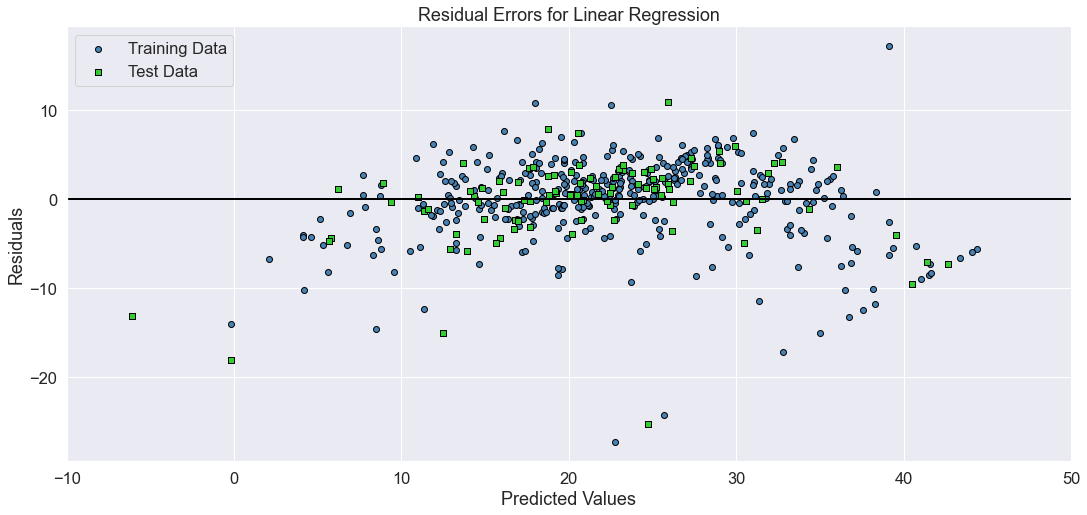

In [21]:
plt.scatter(y_pred_train, y_pred_train-y_train,
            c='steelblue',marker='o',edgecolor='black',
            label='Training Data')
plt.scatter(y_pred_test, y_pred_test-y_test,
            c='limegreen',marker='s',edgecolor='black',
            label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.title('Residual Errors for Linear Regression')
plt.show()

In [22]:
scores = pd.DataFrame({'Regression Type':['Linear Regression'],'MSE Train Score':[mse_train], 'MSE Test Score':[mse_test], 'R^2 Train Score':[r2_train],'R^2 Test Score':[r2_test]})


In [23]:
scores

,Regression Type,MSE Train Score,MSE Test Score,R^2 Train Score,R^2 Test Score
0,Linear Regression,21.641413,24.291119,0.750886,0.668759


### Ridge Regression

In [24]:
def ridge_regression(a):
    # with sklearn
    m1 = Ridge(alpha=a)
    m1.fit(x_train, y_train)

    print('For training set α='+str(a)+'\n')
    print('Intercept: ', m1.intercept_,'\n')
    print('Coefficients: ', m1.coef_,'\n')

    # Predict on the train data
    y_pred_train = m1.predict(x_train)

    # Predict on the test data
    y_pred_test = m1.predict(x_test)

    # print('\nFor testing set\n')
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    # print("R-squared: ", r2,'\n')

    # Calculate the mean squared error
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    # print("Mean Squared Error: ", mse,'\n')

    temp = pd.DataFrame({'Regression Type':['Ridge Regression, α='+str(a)+''],'MSE Train Score':[mse_train], 'MSE Test Score':[mse_test], 'R^2 Train Score':[r2_train],'R^2 Test Score':[r2_test]})
    

    # Plot
    plt.scatter(y_pred_train, y_pred_train-y_train,
                c='steelblue',marker='o',edgecolor='black',
                label='Training Data')
    plt.scatter(y_pred_test, y_pred_test-y_test,
                c='limegreen',marker='s',edgecolor='black',
                label='Test Data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
    plt.xlim([-10,50])
    plt.title('Residual Errors for Ridge, α='+str(a)+'')
    plt.show()

    return temp

For training set α=0.001

Intercept:  30.237220919203835 

Coefficients:  [-1.13048818e-01  3.01142162e-02  4.03215214e-02  2.78407722e+00
 -1.71888387e+01  4.43891333e+00 -6.30727570e-03 -1.44766825e+00
  2.62403820e-01 -1.06482208e-02 -9.15297505e-01  1.23518659e-02
 -5.08596323e-01] 



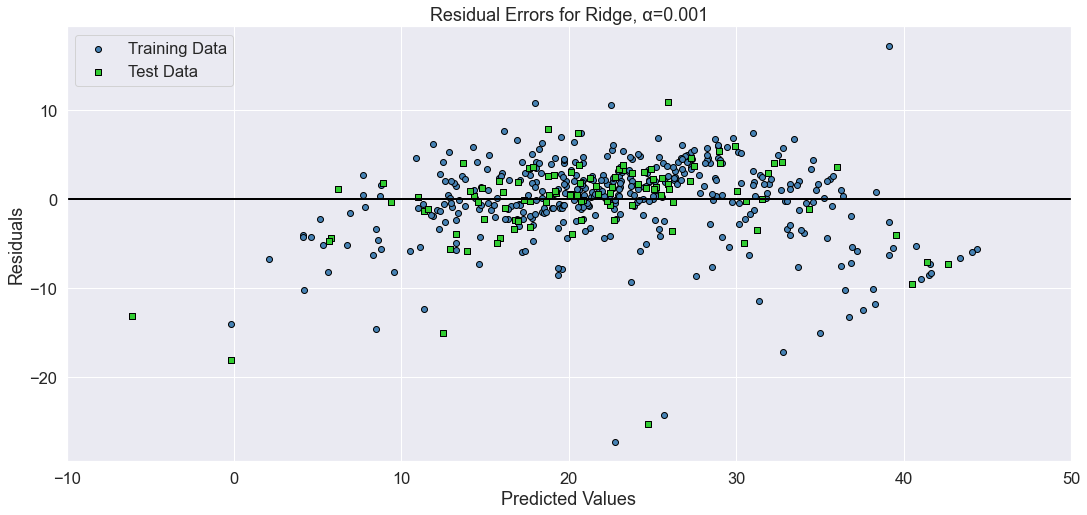

For training set α=0.01

Intercept:  30.152156775378952 

Coefficients:  [-1.12985398e-01  3.01477290e-02  3.97929679e-02  2.78084775e+00
 -1.70656728e+01  4.43960807e+00 -6.40468889e-03 -1.44590837e+00
  2.62172574e-01 -1.06610344e-02 -9.13880463e-01  1.23566074e-02
 -5.08818863e-01] 



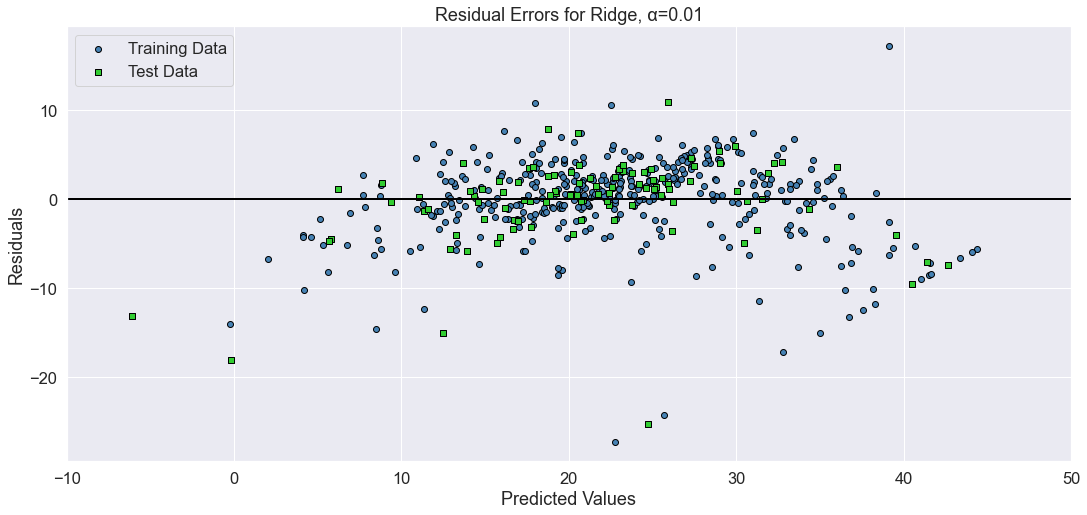

For training set α=0.1

Intercept:  29.366271272576753 

Coefficients:  [-1.12399694e-01  3.04593914e-02  3.48958400e-02  2.75033318e+00
 -1.59244585e+01  4.44577949e+00 -7.30474388e-03 -1.42960751e+00
  2.60042840e-01 -1.07802286e-02 -9.00771040e-01  1.24004789e-02
 -5.10902332e-01] 



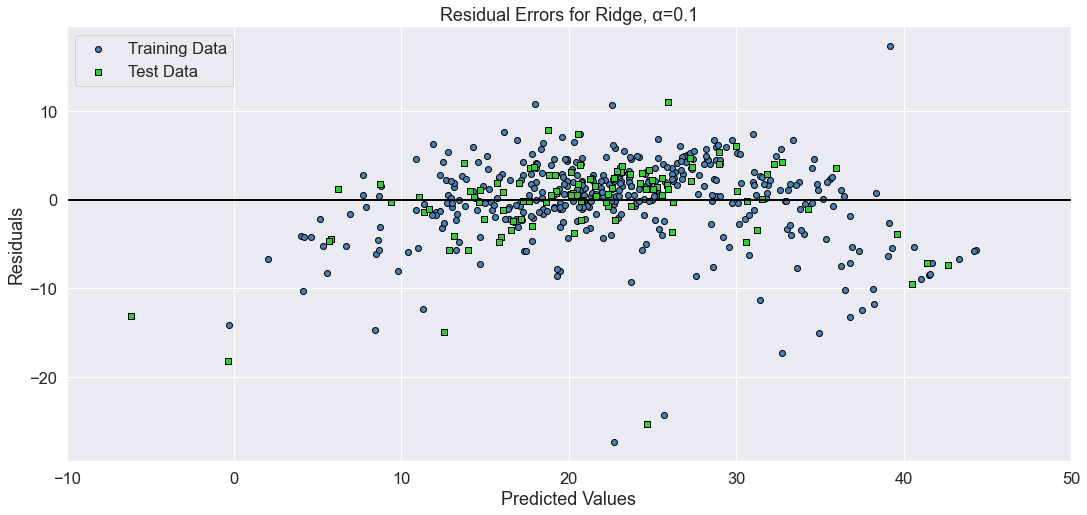

For training set α=1

Intercept:  25.104099233774527 

Coefficients:  [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01] 



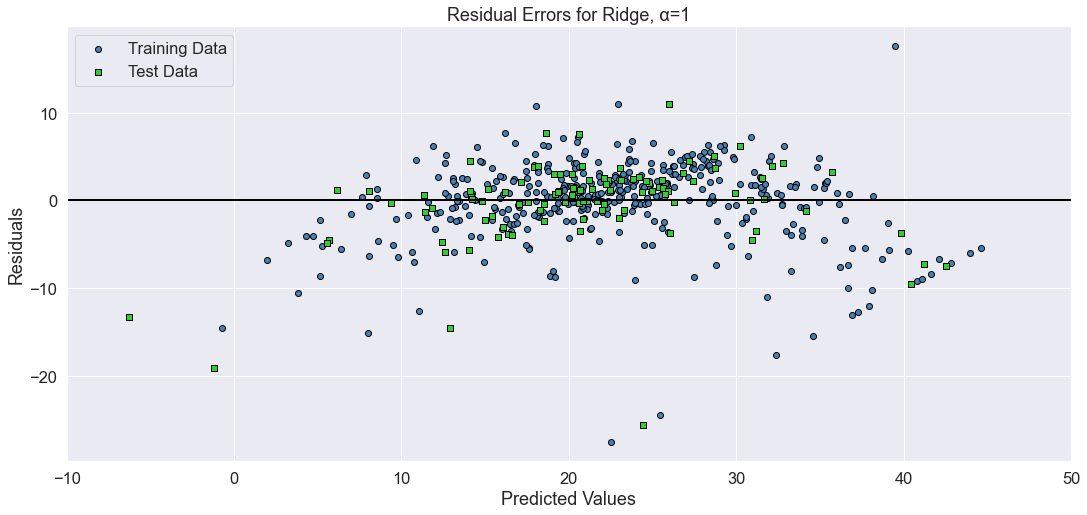

For training set α=2

Intercept:  23.3348734420187 

Coefficients:  [-1.07929630e-01  3.32009818e-02 -5.14687975e-03  2.40440104e+00
 -6.59317640e+00  4.45017330e+00 -1.42269994e-02 -1.29718750e+00
  2.44806300e-01 -1.18331792e-02 -7.97017204e-01  1.27473461e-02
 -5.31622574e-01] 



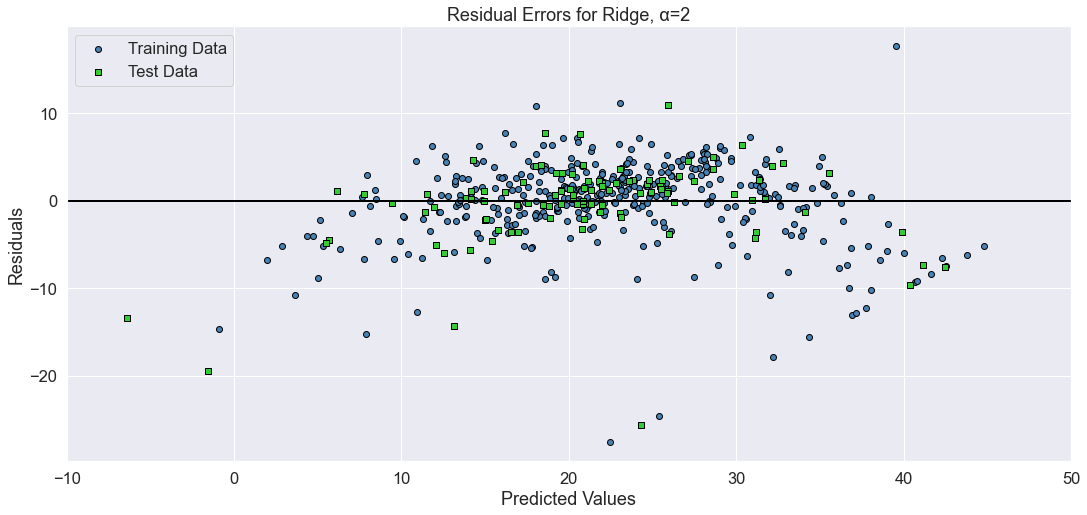

For training set α=5

Intercept:  22.036081264767162 

Coefficients:  [-0.10696184  0.03448822 -0.01897629  2.12418278 -3.41613155  4.36224263
 -0.01574942 -1.25328057  0.24359372 -0.01233222 -0.76793697  0.01283782
 -0.54566807] 



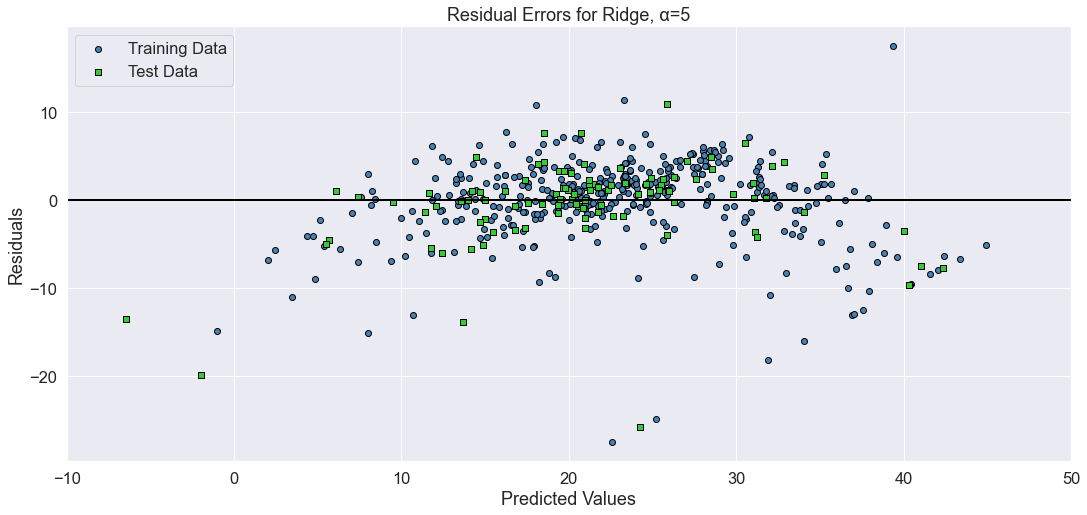

For training set α=10

Intercept:  22.439732052473843 

Coefficients:  [-0.10713363  0.03555248 -0.02627747  1.81329133 -1.88924475  4.19532572
 -0.01534126 -1.23262135  0.24803063 -0.01274419 -0.76176896  0.01283334
 -0.561835  ] 



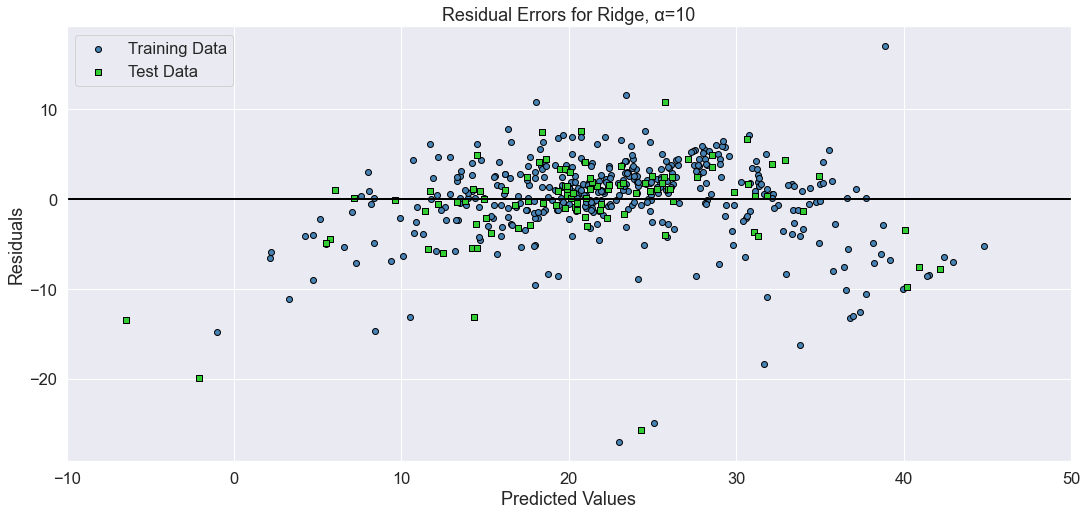

In [25]:
alpha_values = [0.001,0.01,0.1,1,2,5,10]

for i in alpha_values:
    temp = ridge_regression(i)
    scores = pd.concat([scores, temp])

### Lasso Regression

In [26]:
def lasso_regression(a):
    # with sklearn
    m1 = Lasso(alpha=a)
    m1.fit(x_train, y_train)

    print('For training set α='+str(a)+'\n')
    print('Intercept: ', m1.intercept_,'\n')
    print('Coefficients: ', m1.coef_,'\n')

    # Predict on the train data
    y_pred_train = m1.predict(x_train)

    # Predict on the test data
    y_pred_test = m1.predict(x_test)

    # print('\nFor testing set\n')
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    # print("R-squared: ", r2,'\n')

    # Calculate the mean squared error
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    # print("Mean Squared Error: ", mse,'\n')

    temp = pd.DataFrame({'Regression Type':['Lasso Regression, α='+str(a)+''],'MSE Train Score':[mse_train], 'MSE Test Score':[mse_test], 'R^2 Train Score':[r2_train],'R^2 Test Score':[r2_test]})
    
    # Plot
    plt.scatter(y_pred_train, y_pred_train-y_train,
                c='steelblue',marker='o',edgecolor='black',
                label='Training Data')
    plt.scatter(y_pred_test, y_pred_test-y_test,
                c='limegreen',marker='s',edgecolor='black',
                label='Test Data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
    plt.xlim([-10,50])
    plt.title('Residual Errors for Lasso, α='+str(a)+'')
    plt.show()

    return temp

For training set α=0.001

Intercept:  30.02702982625412 

Coefficients:  [-1.12881360e-01  3.01954998e-02  3.89490293e-02  2.76307020e+00
 -1.68662604e+01  4.43878387e+00 -6.51620597e-03 -1.44268060e+00
  2.61824758e-01 -1.06817501e-02 -9.11693590e-01  1.23646200e-02
 -5.09377240e-01] 



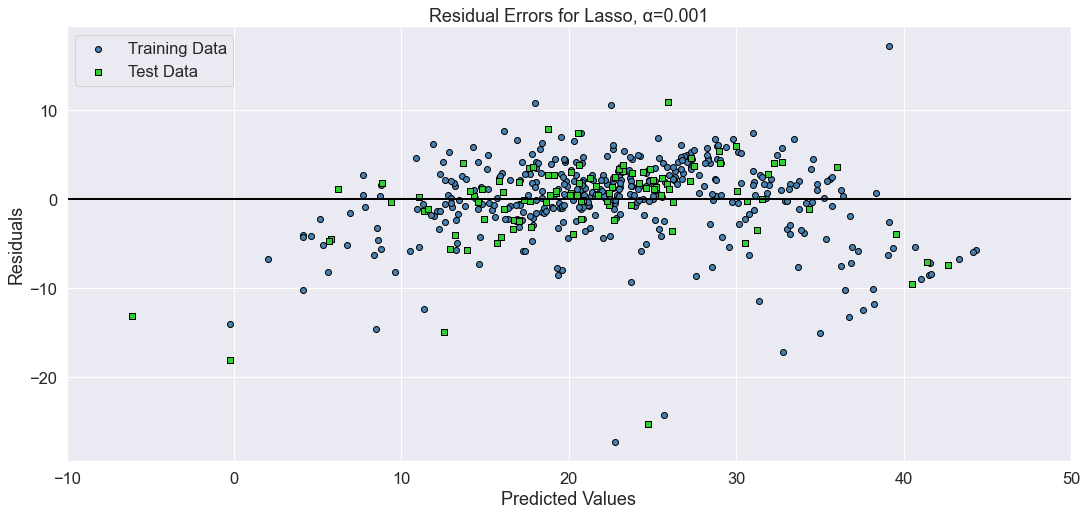

For training set α=0.01

Intercept:  28.049877092278933 

Coefficients:  [-1.11311800e-01  3.09610605e-02  2.60617482e-02  2.57076499e+00
 -1.38392323e+01  4.43831668e+00 -8.49500066e-03 -1.39603234e+00
  2.56384236e-01 -1.09964721e-02 -8.77833191e-01  1.24841641e-02
 -5.16627679e-01] 



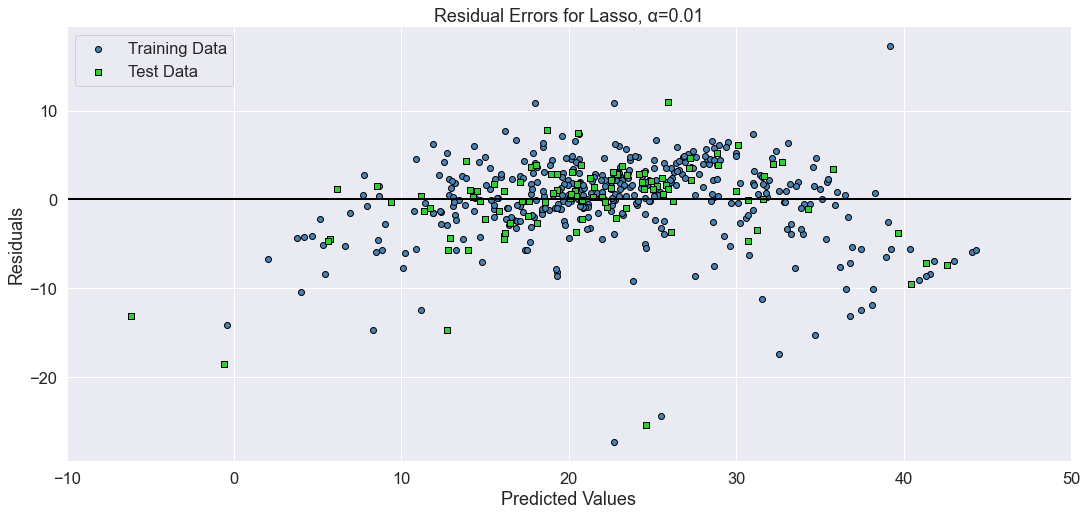

For training set α=0.1

Intercept:  19.859769480417462 

Coefficients:  [-0.10415691  0.03489335 -0.01678527  0.91995182 -0.          4.31168655
 -0.01512583 -1.15148729  0.23923695 -0.01296223 -0.73224678  0.01309057
 -0.56467442] 



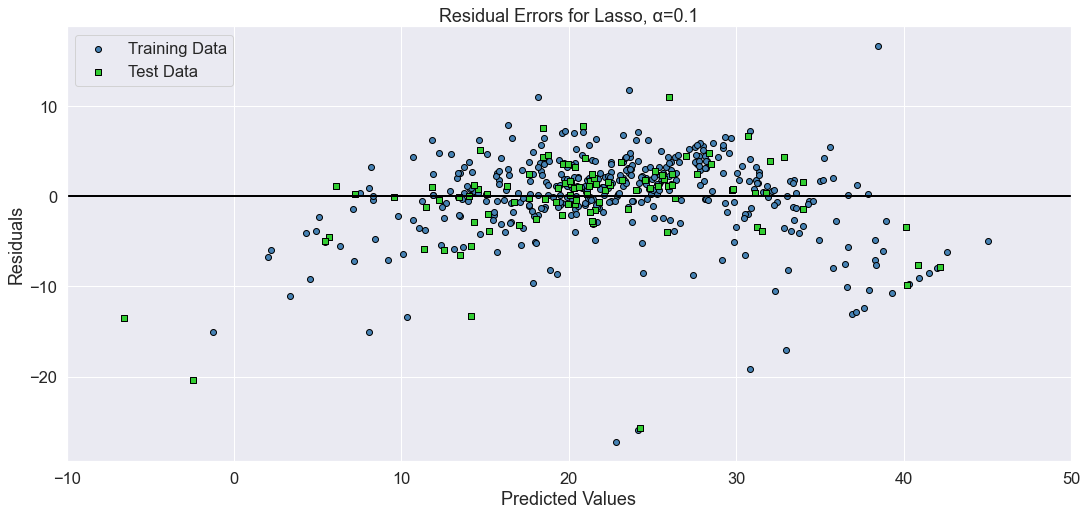

For training set α=1

Intercept:  34.93578037791188 

Coefficients:  [-0.07660927  0.02850064 -0.          0.         -0.          1.63048892
  0.01639478 -0.63085765  0.21965363 -0.01228558 -0.70858233  0.0111811
 -0.74710661] 



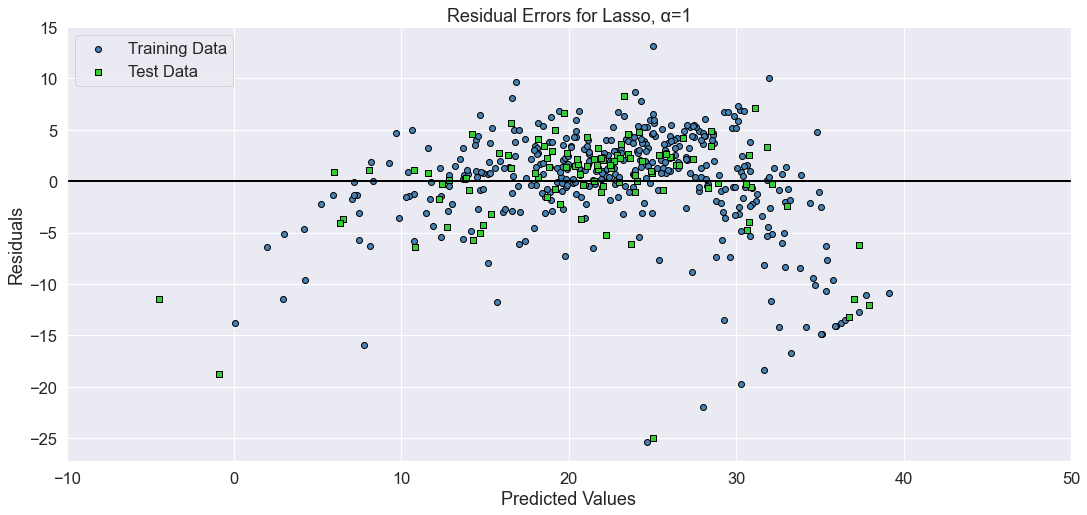

For training set α=2

Intercept:  40.208149124621 

Coefficients:  [-4.06892271e-02  1.33316634e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  4.39205496e-02 -5.07558241e-04
  1.38017649e-01 -8.74150619e-03 -6.02554874e-01  9.61393576e-03
 -8.48900588e-01] 



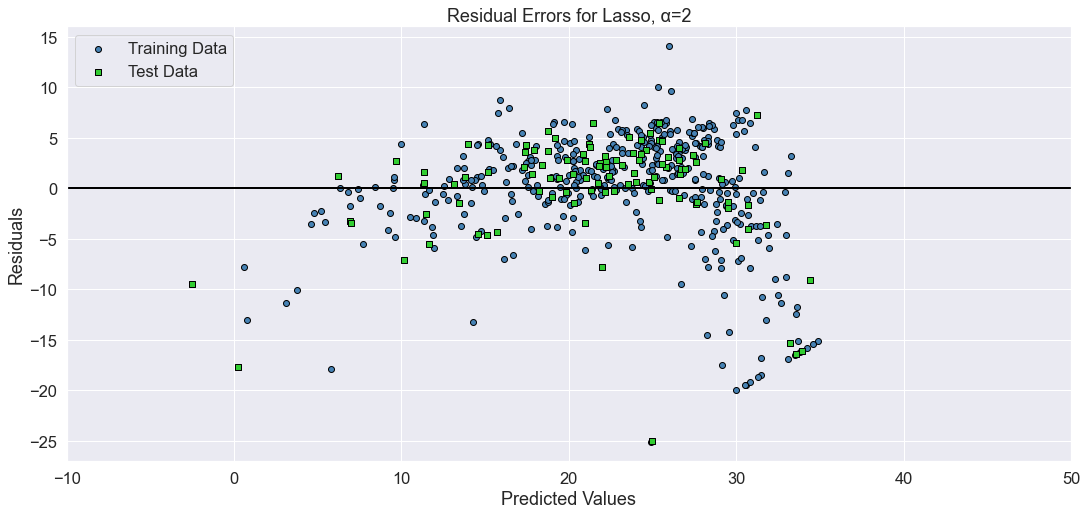

For training set α=5

Intercept:  29.85361176146456 

Coefficients:  [-0.          0.0203097  -0.          0.          0.          0.
  0.03165228 -0.          0.         -0.00737306 -0.          0.00910812
 -0.78091126] 



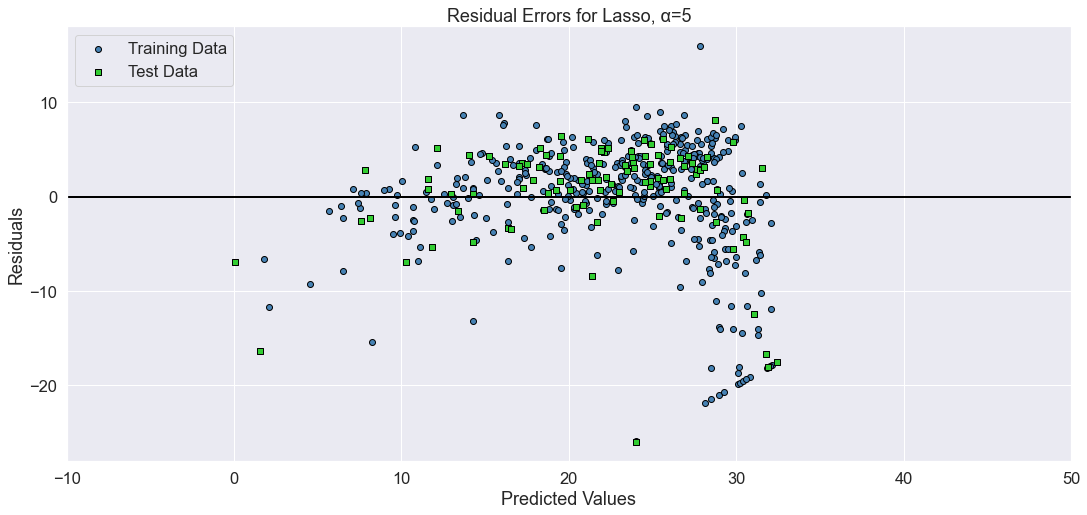

For training set α=10

Intercept:  30.390737497013138 

Coefficients:  [-0.          0.00632092 -0.          0.          0.          0.
  0.         -0.          0.         -0.0090727  -0.          0.00989229
 -0.60414765] 



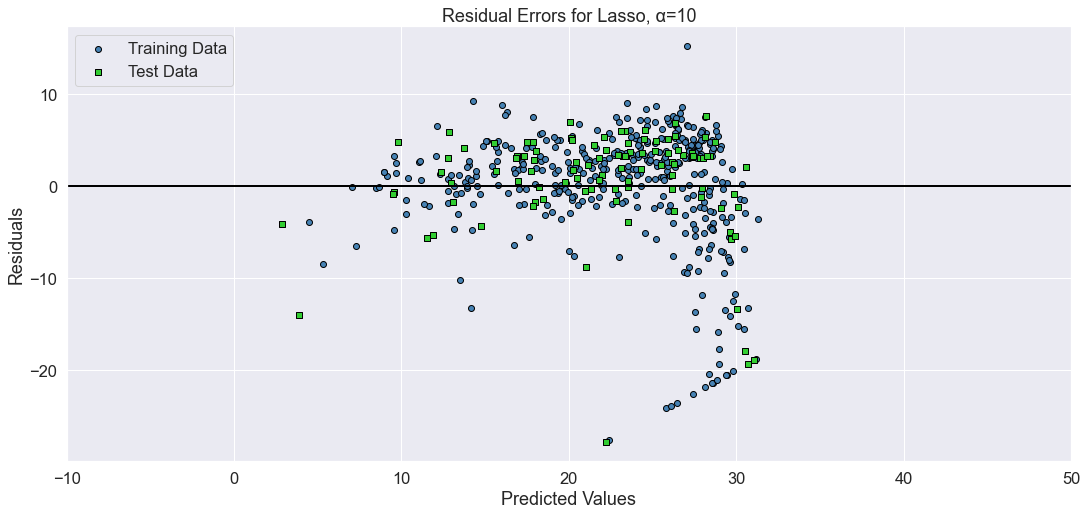

In [27]:
alpha_values = [0.001,0.01,0.1,1,2,5,10]

for i in alpha_values:
    temp = lasso_regression(i)
    scores = pd.concat([scores, temp])

In [28]:
scores = scores.sort_values(['MSE Train Score','MSE Test Score','R^2 Train Score','R^2 Test Score'],
              ascending = [True,True,True,True])
scores

,Regression Type,MSE Train Score,MSE Test Score,R^2 Train Score,R^2 Test Score
0,Linear Regression,21.641413,24.291119,0.750886,0.668759
0,"Ridge Regression, α=0.001",21.641413,24.291178,0.750886,0.668759
0,"Ridge Regression, α=0.01",21.641471,24.291746,0.750885,0.668751
0,"Lasso Regression, α=0.001",21.641781,24.288792,0.750881,0.668791
0,"Ridge Regression, α=0.1",21.646476,24.301026,0.750827,0.668624
0,"Lasso Regression, α=0.01",21.678190,24.303336,0.750462,0.668593
0,"Ridge Regression, α=1",21.824118,24.477191,0.748783,0.666222
0,"Ridge Regression, α=2",21.993370,24.610934,0.746834,0.664398
0,"Ridge Regression, α=5",22.250000,24.721390,0.743880,0.662892
0,"Ridge Regression, α=10",22.435172,24.648348,0.741749,0.663888


In Linear Regression: We can observe the MSE and R^2 values. We can use these values as a becnchmark when choosing the Regression model and during optimization. In Lasso Regression: We can observe that these are the worst performers out of all the models. In Ridge Regression: We can observe the MSE and R^2 become poor very quickly as we increase alpha. For both Lasso and Ridge regressions, we ca. observe that the smallest apha values are the best performers. But a smaller alpha means a smaller penalization hence it would be counterproductive to what we are trying to achieve through regularization. We should further study the magnitude of penalization on the features.We could also study feature importance through Principal Component Analysis. To conclude, Linear Regression is the best regression model we built.

In [29]:
print("My name is Hariharan Manickam")
print("My NetID is: hm32")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hariharan Manickam
My NetID is: hm32
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
